In [1]:
import pandas as pd 

In [2]:
data= pd.read_csv("merged_data.csv")

C:\Users\mitra\AppData\Local\Temp\ipykernel_57228\4031505531.py:1: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("merged_data.csv")


In [3]:
data.head()

,subject_id,intime,gender,race,chiefcomplaint,anchor_age,dod,diedWithin30days,died_in_30days,exact_day_of_death,last_known_alive,follow_up_days,age_group,race_standard,chiefcomplaint_cleaned,snomed_codes,snomed_primary
0,10000032,2180-05-06 19:17:00,F,WHITE,Hypotension,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,['hypotension'],['45007003'],45007003
1,10000032,2180-05-06 19:17:00,F,WHITE,"Abd pain, Abdominal distention",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['abd pain', 'abd distention']","['21522001', '609624008']",21522001
2,10000032,2180-05-06 19:17:00,F,WHITE,"n/v/d, Abd pain",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['n/v/d', 'abd pain']","['16932000+62315008', '21522001']",16932000+62315008
3,10000032,2180-05-06 19:17:00,F,WHITE,Abdominal distention,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,['abd distention'],['609624008'],609624008
4,10000032,2180-05-06 19:17:00,F,WHITE,"Abdominal distention, Abd pain, LETHAGIC",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['abd distention', 'abd pain', 'ethagic']","['609624008', '21522001']",609624008


In [4]:
import ast
data['snomed_codes'] = data['snomed_codes'].apply(ast.literal_eval)


In [5]:
data.head()

,subject_id,intime,gender,race,chiefcomplaint,anchor_age,dod,diedWithin30days,died_in_30days,exact_day_of_death,last_known_alive,follow_up_days,age_group,race_standard,chiefcomplaint_cleaned,snomed_codes,snomed_primary
0,10000032,2180-05-06 19:17:00,F,WHITE,Hypotension,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,['hypotension'],[45007003],45007003
1,10000032,2180-05-06 19:17:00,F,WHITE,"Abd pain, Abdominal distention",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['abd pain', 'abd distention']","[21522001, 609624008]",21522001
2,10000032,2180-05-06 19:17:00,F,WHITE,"n/v/d, Abd pain",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['n/v/d', 'abd pain']","[16932000+62315008, 21522001]",16932000+62315008
3,10000032,2180-05-06 19:17:00,F,WHITE,Abdominal distention,52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,['abd distention'],[609624008],609624008
4,10000032,2180-05-06 19:17:00,F,WHITE,"Abdominal distention, Abd pain, LETHAGIC",52.0,2180-09-09,False,0,125.0,2180-09-09,125,46-65,White,"['abd distention', 'abd pain', 'ethagic']","[609624008, 21522001]",609624008


In [6]:
# Basic shape and info
print(data.shape)
print(data.info())
print(data.describe(include="all"))

# Check for missing values
print(data.isnull().sum())


(3297455, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297455 entries, 0 to 3297454
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   subject_id              int64  
 1   intime                  object 
 2   gender                  object 
 3   race                    object 
 4   chiefcomplaint          object 
 5   anchor_age              float64
 6   dod                     object 
 7   diedWithin30days        bool   
 8   died_in_30days          int64  
 9   exact_day_of_death      float64
 10  last_known_alive        object 
 11  follow_up_days          int64  
 12  age_group               object 
 13  race_standard           object 
 14  chiefcomplaint_cleaned  object 
 15  snomed_codes            object 
 16  snomed_primary          object 
dtypes: bool(1), float64(2), int64(3), object(11)
memory usage: 405.7+ MB
None
          subject_id               intime   gender     race chiefcomplaint  \
count   3.297

In [7]:
# Overall rate
data['died_in_30days'].value_counts(normalize=True)


died_in_30days
0    0.988078
1    0.011922
Name: proportion, dtype: float64

In [9]:
# Overall rate
data['died_in_30days'].value_counts()

died_in_30days
0    3258143
1      39312
Name: count, dtype: int64

In [10]:
# Mortality rate by gender
gender_mortality = data.groupby("gender")["died_in_30days"].mean()
print(gender_mortality)


gender
F    0.011341
M    0.012455
Name: died_in_30days, dtype: float64


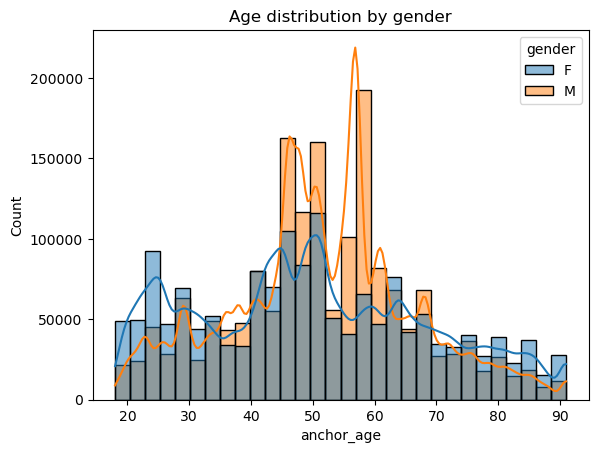

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=data, x="anchor_age", hue="gender", kde=True, bins=30)
plt.title("Age distribution by gender")
plt.show()


In [12]:
# Step 4: Race Bias Check
# Mortality by race
race_mortality = data.groupby("race_standard")["died_in_30days"].mean()
print(race_mortality)

# Sample sizes (important for fairness)
print(data["race_standard"].value_counts())


race_standard
American Indian/Alaska Native       0.011343
Asian                               0.019871
Black                               0.007489
Hispanic/Latino                     0.005918
Multiple Races                      0.002126
Native Hawaiian/Pacific Islander    0.019000
Other/Unknown/Not Reported          0.017574
White                               0.015577
Name: died_in_30days, dtype: float64
race_standard
White                               1635463
Black                               1175976
Hispanic/Latino                      309411
Other/Unknown/Not Reported           103162
Asian                                 64566
American Indian/Alaska Native          5466
Native Hawaiian/Pacific Islander       2000
Multiple Races                         1411
Name: count, dtype: int64


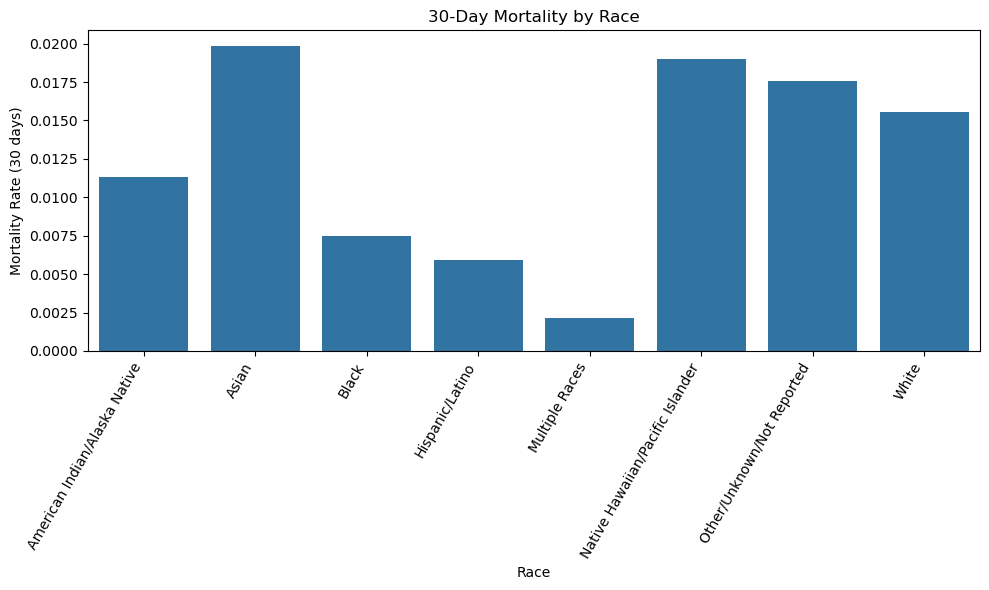

In [23]:
#sns.barplot(x=race_mortality.index, y=race_mortality.values)
#plt.xticks(rotation=45)
#plt.ylabel("Mortality Rate (30 days)")
#plt.title("30-Day Mortality by Race")
#plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Increase size for better readability
sns.barplot(x=race_mortality.index, y=race_mortality.values)

plt.xticks(rotation=60, ha='right')  # Rotate more and align right
plt.ylabel("Mortality Rate (30 days)")
plt.xlabel("Race")
plt.title("30-Day Mortality by Race")
plt.tight_layout()  # Prevent cutoff of labels
plt.show()


In [26]:
#  Step 5: Age Bias Check

age_group_mortality = data.groupby("age_group")["died_in_30days"].mean()
print(age_group_mortality)

# Age group distribution
print(data["age_group"].value_counts())


age_group
18-30    0.001381
31-45    0.004249
46-65    0.009870
66-80    0.026201
80+      0.050654
Name: died_in_30days, dtype: float64
age_group
46-65    1486859
31-45     683850
18-30     489399
66-80     459258
80+       178089
Name: count, dtype: int64


In [28]:
# Step 6: Cross-Fairness Check (Intersectional)

intersection = data.groupby(["gender", "race_standard"])["died_in_30days"].mean().unstack()
print(intersection)


race_standard  American Indian/Alaska Native     Asian     Black  \
gender                                                             
F                                   0.009091  0.015839  0.008927   
M                                   0.015078  0.025113  0.006276   

race_standard  Hispanic/Latino  Multiple Races  \
gender                                           
F                     0.005563        0.002370   
M                     0.006343        0.001764   

race_standard  Native Hawaiian/Pacific Islander  Other/Unknown/Not Reported  \
gender                                                                        
F                                      0.017915                    0.015455   
M                                      0.019481                    0.020245   

race_standard     White  
gender                   
F              0.013783  
M              0.017177  


In [29]:
data.groupby(["gender", "race_standard"])["died_in_30days"].mean()


gender  race_standard                   
F       American Indian/Alaska Native       0.009091
        Asian                               0.015839
        Black                               0.008927
        Hispanic/Latino                     0.005563
        Multiple Races                      0.002370
        Native Hawaiian/Pacific Islander    0.017915
        Other/Unknown/Not Reported          0.015455
        White                               0.013783
M       American Indian/Alaska Native       0.015078
        Asian                               0.025113
        Black                               0.006276
        Hispanic/Latino                     0.006343
        Multiple Races                      0.001764
        Native Hawaiian/Pacific Islander    0.019481
        Other/Unknown/Not Reported          0.020245
        White                               0.017177
Name: died_in_30days, dtype: float64

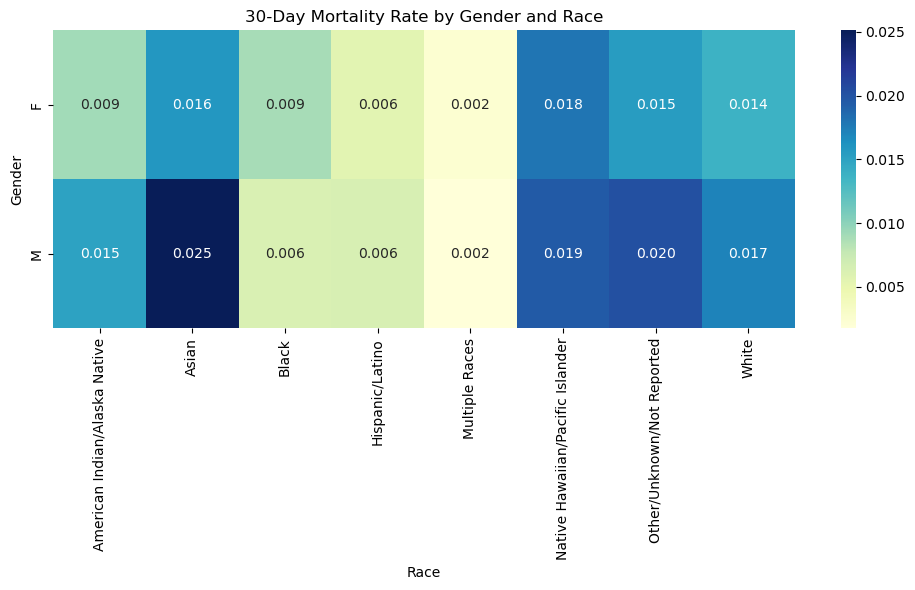

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(intersection, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("30-Day Mortality Rate by Gender and Race")
plt.ylabel("Gender")
plt.xlabel("Race")
plt.tight_layout()
plt.show()


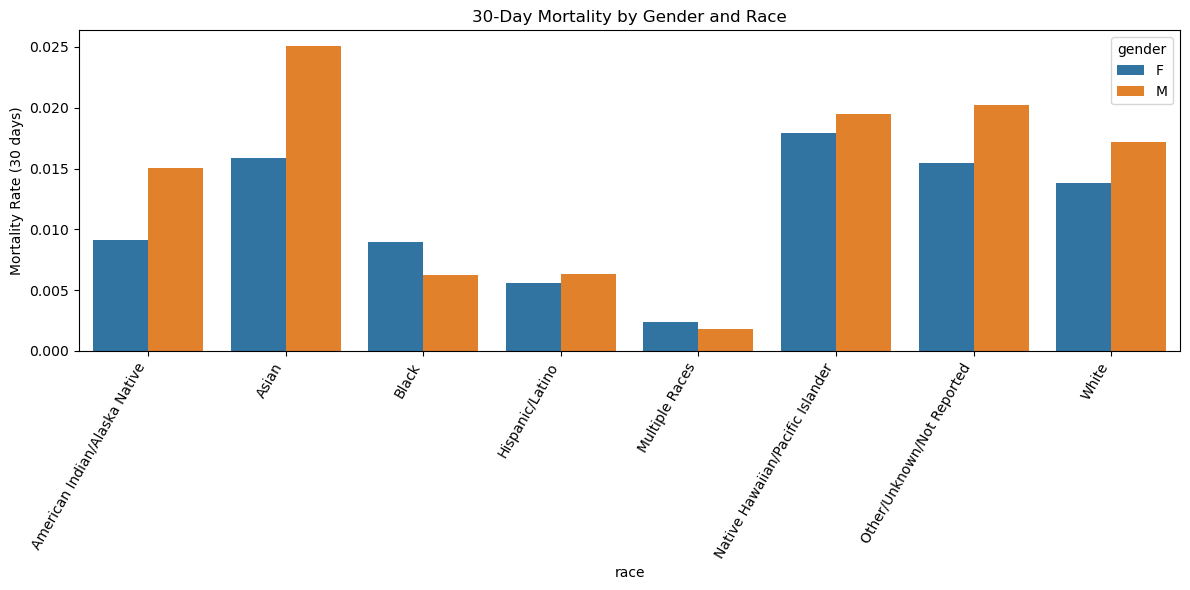

In [33]:
# Grouped Bar Chart (Best for comparisons)
intersection_reset = intersection.reset_index().melt(id_vars='gender', var_name='race', value_name='mortality_rate')

plt.figure(figsize=(12, 6))
sns.barplot(data=intersection_reset, x='race', y='mortality_rate', hue='gender')
plt.xticks(rotation=60, ha='right')
plt.ylabel("Mortality Rate (30 days)")
plt.title("30-Day Mortality by Gender and Race")
plt.tight_layout()
plt.show()


In [35]:
data[data["died_in_30days"] == True]


,subject_id,intime,gender,race,chiefcomplaint,anchor_age,dod,diedWithin30days,died_in_30days,exact_day_of_death,last_known_alive,follow_up_days,age_group,race_standard,chiefcomplaint_cleaned,snomed_codes,snomed_primary
94,10000980,2193-08-14 21:25:00,F,BLACK/AFRICAN AMERICAN,Hypoglycemia,73.0,2193-08-26,True,1,11.0,2193-08-26,11,66-80,Black,['hypoglycemia'],[302866003],302866003
95,10000980,2193-08-14 21:25:00,F,BLACK/AFRICAN AMERICAN,DYSPNEA,73.0,2193-08-26,True,1,11.0,2193-08-26,11,66-80,Black,['dyspnea'],[267036007],267036007
96,10000980,2193-08-14 21:25:00,F,BLACK/AFRICAN AMERICAN,Dyspnea,73.0,2193-08-26,True,1,11.0,2193-08-26,11,66-80,Black,['dyspnea'],[267036007],267036007
97,10000980,2193-08-14 21:25:00,F,BLACK/AFRICAN AMERICAN,Dyspnea,73.0,2193-08-26,True,1,11.0,2193-08-26,11,66-80,Black,['dyspnea'],[267036007],267036007
98,10000980,2193-08-14 21:25:00,F,BLACK/AFRICAN AMERICAN,L Foot pain,73.0,2193-08-26,True,1,11.0,2193-08-26,11,66-80,Black,['foot pain'],[59491000052101],59491000052101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297197,19998330,2178-11-18 23:33:00,F,BLACK/AFRICAN AMERICAN,SOB,71.0,2178-12-08,True,1,19.0,2178-12-08,19,66-80,Black,['sob'],[230145002],230145002
3297346,19998485,2184-05-02 19:47:00,F,WHITE,MVC/TRAUMA STAT,47.0,2184-05-02,True,1,-1.0,2184-05-02,-1,46-65,White,['mvc/trauma stat'],[],NaN
3297409,19998843,2187-02-05 08:44:00,M,UNKNOWN,MVC,45.0,2187-02-08,True,1,2.0,2187-02-08,2,31-45,Other/Unknown/Not Reported,['mvc'],[36198007],36198007
3297427,19999287,2197-08-03 19:34:00,F,BLACK/AFRICAN AMERICAN,"Dyspnea, Cough",71.0,2197-09-02,True,1,29.0,2197-09-02,29,66-80,Black,"['dyspnea', 'cough']","[267036007, 49727002]",267036007


In [39]:
# Step 7: Optional Advanced: Visualize with t-SNE or UMAP


In [41]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Choose useful numerical features
numeric_cols = ['anchor_age', 'follow_up_days']

# Drop rows with missing values in these columns
tsne_data = data[numeric_cols].dropna()

# Save labels for coloring
tsne_labels_gender = data.loc[tsne_data.index, 'gender']
tsne_labels_race = data.loc[tsne_data.index, 'race_standard']
tsne_labels_mortality = data.loc[tsne_data.index, 'died_in_30days']


In [ ]:
scaler = StandardScaler()
tsne_scaled = scaler.fit_transform(tsne_data)


In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(tsne_scaled)


In [ ]:
# Convert to DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['gender'] = tsne_labels_gender.values
tsne_df['race'] = tsne_labels_race.values
tsne_df['died_in_30days'] = tsne_labels_mortality.values

# Plot by gender
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='gender', alpha=0.6)
plt.title("t-SNE Visualization Colored by Gender")
plt.show()

# Plot by race
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='race', alpha=0.6)
plt.title("t-SNE Visualization Colored by Race")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot by 30-day mortality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='died_in_30days', palette={True: 'red', False: 'blue'}, alpha=0.5)
plt.title("t-SNE Visualization Colored by 30-Day Mortality")
plt.show()


C:\Users\mitra\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mitra\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\mitra\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mitra\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\mitra\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

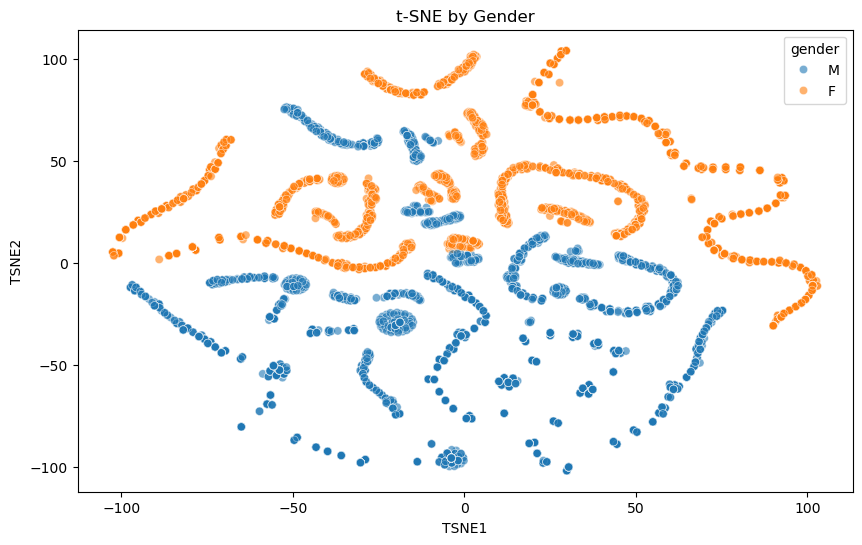

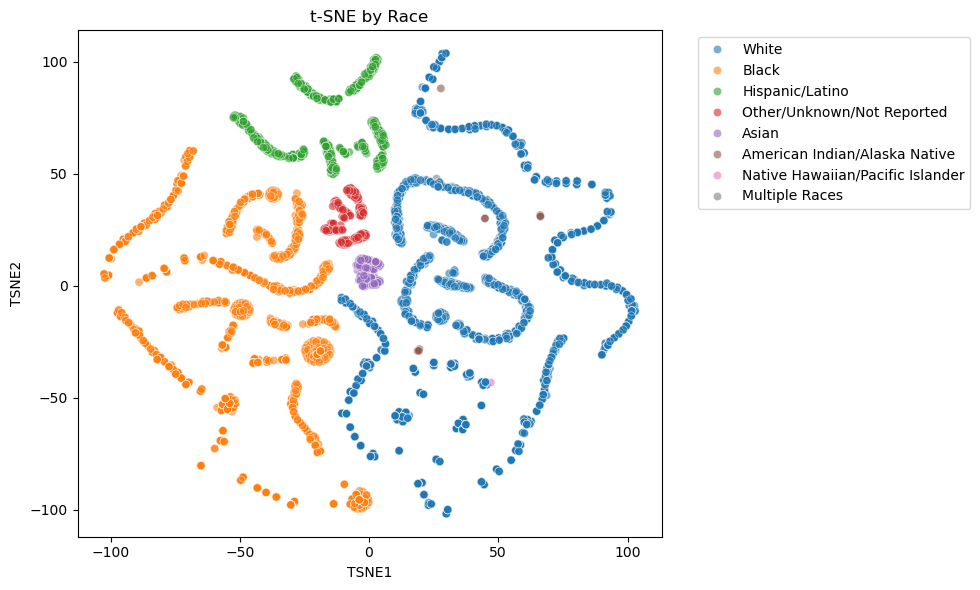

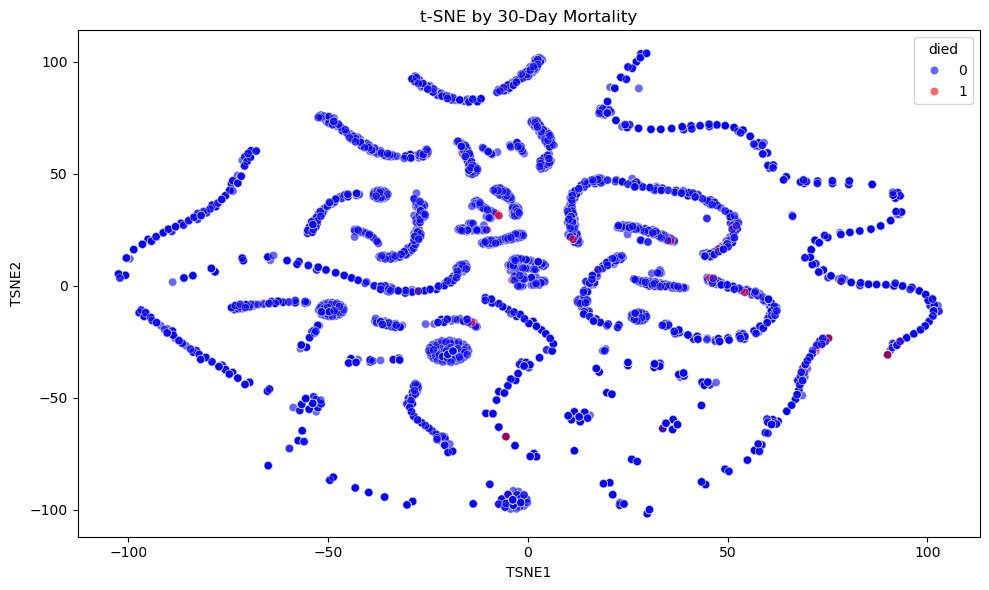

In [43]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Columns you want
columns = ['anchor_age', 'gender', 'race_standard', 'chiefcomplaint_cleaned', 'died_in_30days']

# Step 2: Drop rows with missing important values
filtered_data = data[columns].dropna()

# Step 3: Sample 5000 rows
sampled = filtered_data.sample(n=5000, random_state=42)

# Step 4: Encode categorical columns
# Simplify chief complaint by counting number of symptoms
sampled = sampled.copy()
sampled['complaint_len'] = sampled['chiefcomplaint_cleaned'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# One-hot encode gender and race
encoded = pd.get_dummies(sampled[['gender', 'race_standard']], drop_first=True)

# Combine with numeric columns
tsne_input = pd.concat([sampled[['anchor_age', 'complaint_len']], encoded], axis=1)

# Step 5: Scale
scaler = StandardScaler()
tsne_scaled = scaler.fit_transform(tsne_input)

# Step 6: Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(tsne_scaled)

# Step 7: Prepare for plotting
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['gender'] = sampled['gender'].values
tsne_df['race'] = sampled['race_standard'].values
tsne_df['died'] = sampled['died_in_30days'].values

# Step 8: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='gender', alpha=0.6)
plt.title("t-SNE by Gender")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='race', alpha=0.6)
plt.title("t-SNE by Race")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='died', palette={True: 'red', False: 'blue'}, alpha=0.6)
plt.title("t-SNE by 30-Day Mortality")
plt.tight_layout()
plt.show()


In [47]:
#STEP 1: Imbalance — Who is represented among the 39,312 deaths?

deaths = data[data['died_in_30days'] == 1]
gender_counts = deaths['gender'].value_counts(normalize=True)
print("Gender distribution among 30-day deaths:\n", gender_counts)


Gender distribution among 30-day deaths:
 gender
M    0.545101
F    0.454899
Name: proportion, dtype: float64


In [49]:
data['gender'].value_counts(normalize=True)


gender
M    0.521779
F    0.478221
Name: proportion, dtype: float64

In [51]:
data.groupby("gender")["died_in_30days"].mean()

gender
F    0.011341
M    0.012455
Name: died_in_30days, dtype: float64

In [55]:
# Step 1: Imbalance (only those who died in 30 days)
deaths = data[data['died_in_30days'] == 1]

print("=== Gender Distribution ===")
print("In deaths:")
print(deaths['gender'].value_counts(normalize=True))
print("\n")
print("In full dataset:")
print(data['gender'].value_counts(normalize=True))
print("\n")
print("Mortality rate:")
print(data.groupby('gender')['died_in_30days'].mean())
print("************************************************************")
print("\n")


print("=== Race Distribution ===")
print("In deaths:")
print(deaths['race_standard'].value_counts(normalize=True))
print("\n")
print("In full dataset:")
print(data['race_standard'].value_counts(normalize=True))
print("\n")
print("Mortality rate:")
print(data.groupby('race_standard')['died_in_30days'].mean())
print("************************************************************")
print("\n")

print("=== Age Group Distribution ===")
print("In deaths:")
print(deaths['age_group'].value_counts(normalize=True))
print("\n")
print("In full dataset:")
print(data['age_group'].value_counts(normalize=True))
print("\n")
print("Mortality rate:")
print(data.groupby('age_group')['died_in_30days'].mean())


=== Gender Distribution ===
In deaths:
gender
M    0.545101
F    0.454899
Name: proportion, dtype: float64


In full dataset:
gender
M    0.521779
F    0.478221
Name: proportion, dtype: float64


Mortality rate:
gender
F    0.011341
M    0.012455
Name: died_in_30days, dtype: float64
************************************************************


=== Race Distribution ===
In deaths:
race_standard
White                               0.648021
Black                               0.224028
Hispanic/Latino                     0.046576
Other/Unknown/Not Reported          0.046118
Asian                               0.032636
American Indian/Alaska Native       0.001577
Native Hawaiian/Pacific Islander    0.000967
Multiple Races                      0.000076
Name: proportion, dtype: float64


In full dataset:
race_standard
White                               0.495977
Black                               0.356631
Hispanic/Latino                     0.093833
Other/Unknown/Not Reported          0.031

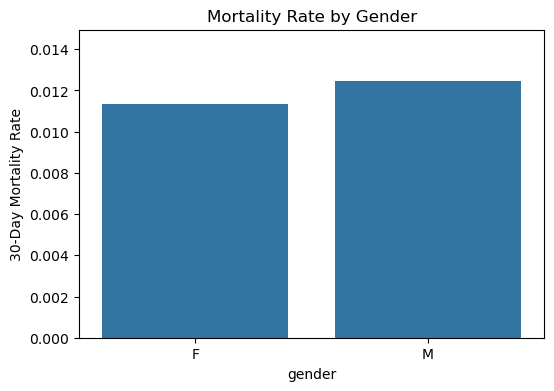

In [57]:
#Mortality Rate by Gender (Bar Plot)

import matplotlib.pyplot as plt
import seaborn as sns

# Gender Mortality Rate
gender_mortality = data.groupby("gender")["died_in_30days"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_mortality, x="gender", y="died_in_30days")
plt.ylabel("30-Day Mortality Rate")
plt.title("Mortality Rate by Gender")
plt.ylim(0, gender_mortality["died_in_30days"].max() * 1.2)
plt.show()


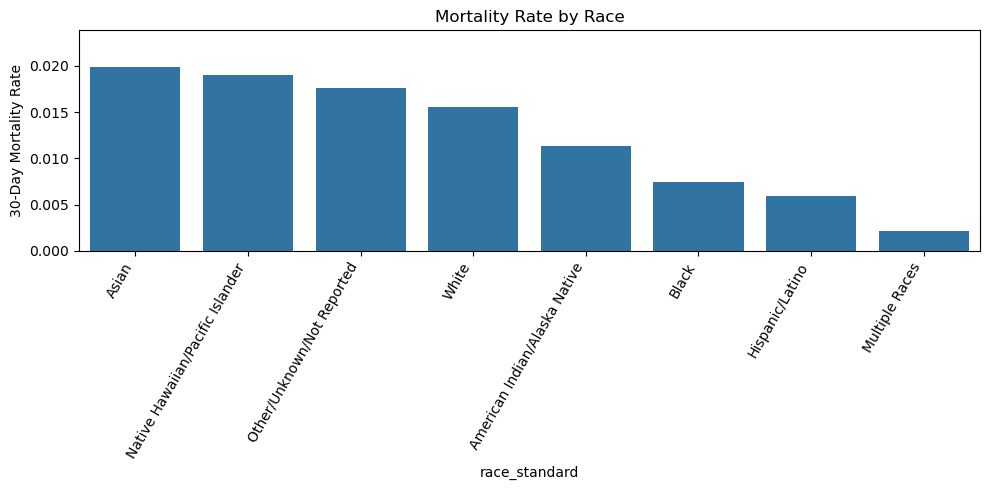

In [59]:
# Mortality Rate by Race (Bar Plot)
# Race Mortality Rate
race_mortality = data.groupby("race_standard")["died_in_30days"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=race_mortality, x="race_standard", y="died_in_30days")
plt.ylabel("30-Day Mortality Rate")
plt.title("Mortality Rate by Race")
plt.xticks(rotation=60, ha="right")
plt.ylim(0, race_mortality["died_in_30days"].max() * 1.2)
plt.tight_layout()
plt.show()


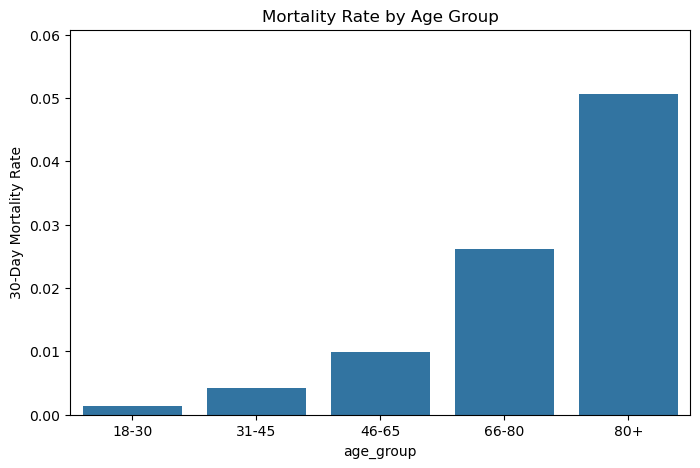

In [61]:
# Mortality Rate by Age Group (Bar Plot)

# Age Group Mortality Rate
age_mortality = data.groupby("age_group")["died_in_30days"].mean().reset_index()

# Ensure logical order
age_order = ["18-30", "31-45", "46-65", "66-80", "80+"]
age_mortality["age_group"] = pd.Categorical(age_mortality["age_group"], categories=age_order, ordered=True)
age_mortality = age_mortality.sort_values("age_group")

plt.figure(figsize=(8, 5))
sns.barplot(data=age_mortality, x="age_group", y="died_in_30days")
plt.ylabel("30-Day Mortality Rate")
plt.title("Mortality Rate by Age Group")
plt.ylim(0, age_mortality["died_in_30days"].max() * 1.2)
plt.show()


In [63]:
from scipy.stats import chi2_contingency

# Gender test
gender_crosstab = pd.crosstab(data['gender'], data['died_in_30days'])
chi2_gender, p_gender, _, _ = chi2_contingency(gender_crosstab)
print("Gender Chi-square test")
print(f"Chi2 = {chi2_gender:.4f}, p-value = {p_gender:.4f}")
print("Significant difference" if p_gender < 0.05 else "No significant difference")
print("---------------------------------------------------")

# Race test
race_crosstab = pd.crosstab(data['race_standard'], data['died_in_30days'])
chi2_race, p_race, _, _ = chi2_contingency(race_crosstab)
print("Race Chi-square test")
print(f"Chi2 = {chi2_race:.4f}, p-value = {p_race:.4f}")
print("Significant difference" if p_race < 0.05 else "No significant difference")
print("---------------------------------------------------")

# Age Group test
age_crosstab = pd.crosstab(data['age_group'], data['died_in_30days'])
chi2_age, p_age, _, _ = chi2_contingency(age_crosstab)
print("Age Group Chi-square test")
print(f"Chi2 = {chi2_age:.4f}, p-value = {p_age:.4f}")
print("Significant difference" if p_age < 0.05 else "No significant difference")


Gender Chi-square test
Chi2 = 86.6269, p-value = 0.0000
Significant difference
---------------------------------------------------
Race Chi-square test
Chi2 = 5409.2936, p-value = 0.0000
Significant difference
---------------------------------------------------
Age Group Chi-square test
Chi2 = 39194.0019, p-value = 0.0000
Significant difference


In [71]:
from scipy.stats import chi2_contingency
import pandas as pd

# Gender
gender_crosstab = pd.crosstab(data['gender'], data['died_in_30days'])
chi2_gender, p_gender, _, _ = chi2_contingency(gender_crosstab)
print("Gender Chi-square test")
print(f"Chi2 = {chi2_gender:.4f}, p-value = {p_gender:.10e}")
print("Significant difference" if p_gender < 0.05 else "No significant difference")
print("---------------------------------------------------")

# Race
race_crosstab = pd.crosstab(data['race_standard'], data['died_in_30days'])
chi2_race, p_race, _, _ = chi2_contingency(race_crosstab)
print("Race Chi-square test")
print(f"Chi2 = {chi2_race:.4f}, p-value = {p_race:.10e}")
print("Significant difference" if p_race < 0.05 else "No significant difference")
print("---------------------------------------------------")

# Age
age_crosstab = pd.crosstab(data['age_group'], data['died_in_30days'])
chi2_age, p_age, _, _ = chi2_contingency(age_crosstab)
print("Age Group Chi-square test")
print(f"Chi2 = {chi2_age:.4f}, p-value = {p_age:.10e}")
print("Significant difference" if p_age < 0.05 else "No significant difference")



Gender Chi-square test
Chi2 = 86.6269, p-value = 1.3105482267e-20
Significant difference
---------------------------------------------------
Race Chi-square test
Chi2 = 5409.2936, p-value = 0.0000000000e+00
Significant difference
---------------------------------------------------
Age Group Chi-square test
Chi2 = 39194.0019, p-value = 0.0000000000e+00
Significant difference


In [73]:
print(f"p-value = {p_gender:.10e}")  # e.g., 1.2e-45


p-value = 1.3105482267e-20


In [75]:
# Calculate mortality rate (mean of 0/1) for each race-gender group
intersection_mortality = data.groupby(['race_standard', 'gender'])['died_in_30days'].mean().reset_index()

# Rename column for clarity
intersection_mortality.rename(columns={'died_in_30days': 'mortality_rate'}, inplace=True)


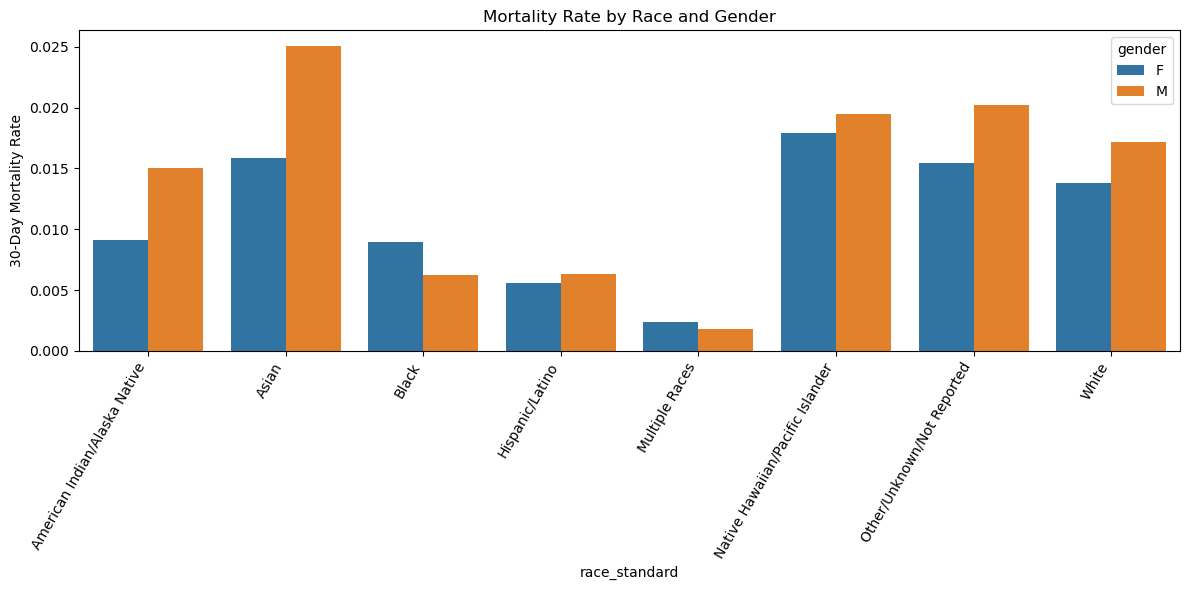

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=intersection_mortality, x='race_standard', y='mortality_rate', hue='gender')
plt.xticks(rotation=60, ha='right')
plt.ylabel("30-Day Mortality Rate")
plt.title("Mortality Rate by Race and Gender")
plt.tight_layout()
plt.show()


In [85]:
# Step 1: Group by race and gender
grouped = data.groupby(['race_standard', 'gender'])

# Step 2: Count total patients and number of deaths
intersection_df = grouped.agg(
    total_patients=('died_in_30days', 'count'),
    deaths_30days=('died_in_30days', 'sum')
).reset_index()

# Step 3: Compute mortality rate
intersection_df['mortality_rate'] = intersection_df['deaths_30days'] / intersection_df['total_patients']

# Step 4 (Optional): Sort by mortality rate
intersection_df = intersection_df.sort_values('mortality_rate', ascending=False)

# Step 5: Print the final DataFrame
print(intersection_df)


                       race_standard gender  total_patients  deaths_30days  \
3                              Asian      M           28073            705   
13        Other/Unknown/Not Reported      M           45640            924   
11  Native Hawaiian/Pacific Islander      M            1386             27   
10  Native Hawaiian/Pacific Islander      F             614             11   
15                             White      M          864320          14846   
2                              Asian      F           36493            578   
12        Other/Unknown/Not Reported      F           57522            889   
1      American Indian/Alaska Native      M            2056             31   
14                             White      F          771143          10629   
0      American Indian/Alaska Native      F            3410             31   
4                              Black      F          538260           4805   
7                    Hispanic/Latino      M          140786     

In [91]:
# Define selected race groups
selected_races = ["White", "Black", "Asian", "Hispanic/Latino"]

# Filter dataset to include only selected races
filtered_data = data[data['race_standard'].isin(selected_races)]

# Group by race and gender
grouped = filtered_data.groupby(['race_standard', 'gender'])

# Aggregate stats
intersection_df = grouped.agg(
    total_patients=('died_in_30days', 'count'),
    deaths_30days=('died_in_30days', 'sum')
).reset_index()

# Calculate mortality rate
intersection_df['mortality_rate'] = intersection_df['deaths_30days'] / intersection_df['total_patients']

# Sort by mortality rate (optional)
intersection_df = intersection_df.sort_values('mortality_rate', ascending=False)

# Show final table
print(intersection_df)


     race_standard gender  total_patients  deaths_30days  mortality_rate
1            Asian      M           28073            705        0.025113
7            White      M          864320          14846        0.017177
0            Asian      F           36493            578        0.015839
6            White      F          771143          10629        0.013783
2            Black      F          538260           4805        0.008927
5  Hispanic/Latino      M          140786            893        0.006343
3            Black      M          637716           4002        0.006276
4  Hispanic/Latino      F          168625            938        0.005563


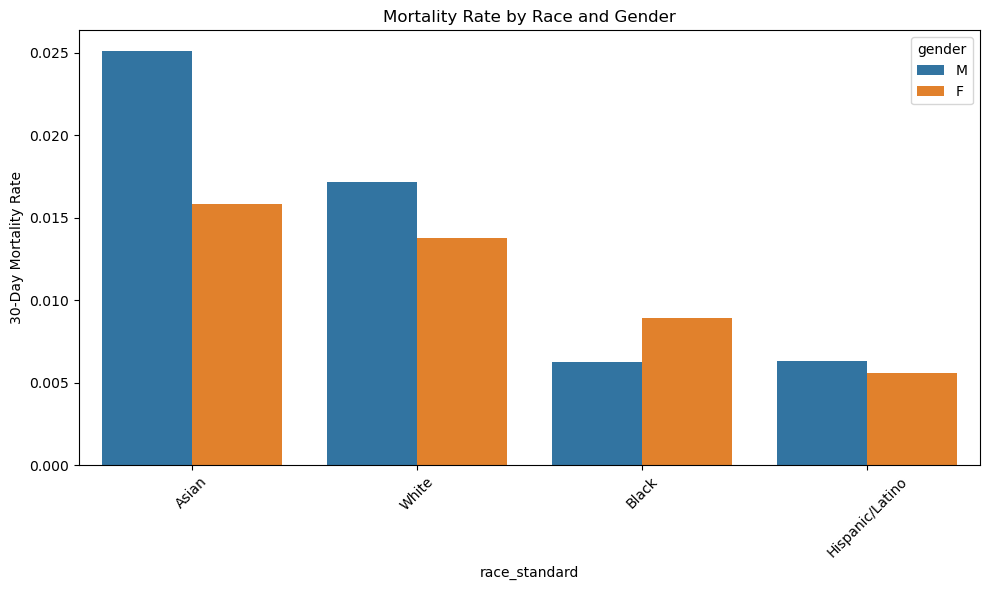

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=intersection_df, x="race_standard", y="mortality_rate", hue="gender")
plt.ylabel("30-Day Mortality Rate")
plt.title("Mortality Rate by Race and Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Proxy Feature Analysis

In [97]:
# Create number of complaints feature (if not done already)
data['complaint_len'] = data['chiefcomplaint_cleaned'].apply(
    lambda x: len(eval(x)) if isinstance(x, str) else 0
)


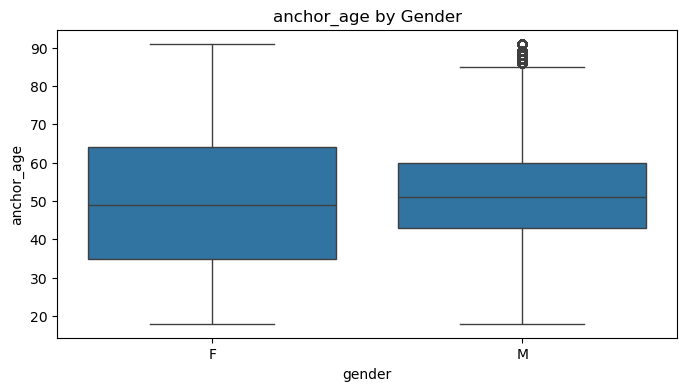

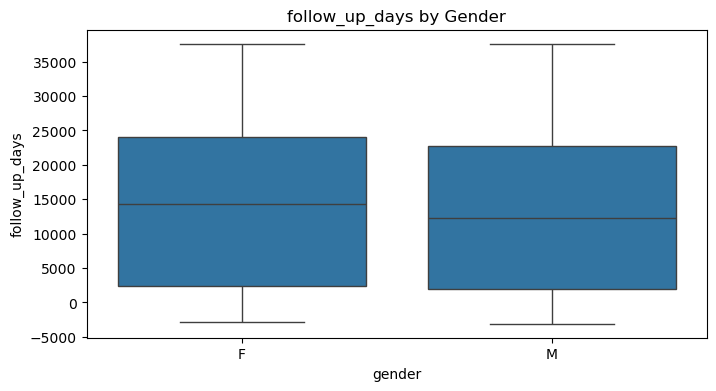

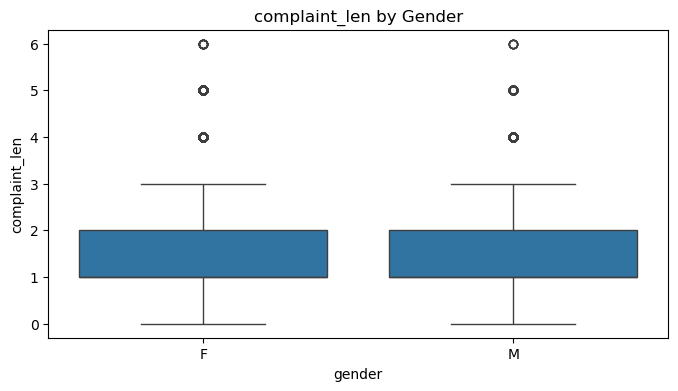

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['anchor_age', 'follow_up_days', 'complaint_len']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='gender', y=feature)
    plt.title(f"{feature} by Gender")
    plt.show()


In [99]:
from scipy.stats import ttest_ind

for feature in numeric_features:
    male_values = data[data['gender'] == 'M'][feature].dropna()
    female_values = data[data['gender'] == 'F'][feature].dropna()
    
    t_stat, p_val = ttest_ind(male_values, female_values, equal_var=False)
    print(f"{feature}: t = {t_stat:.4f}, p = {p_val:.4e}")


anchor_age: t = 70.0668, p = 0.0000e+00
follow_up_days: t = -83.8777, p = 0.0000e+00
complaint_len: t = -6.2163, p = 5.0912e-10


In [103]:
# Create complaint length feature
data['complaint_len'] = data['chiefcomplaint_cleaned'].apply(
    lambda x: len(eval(x)) if isinstance(x, str) else 0
)

# Check for demographic differences in features
numeric_features = ['anchor_age', 'follow_up_days', 'complaint_len']

# Summary statistics by gender
for feature in numeric_features:
    print(f"\n{feature} by gender:")
    print(data.groupby('gender')[feature].agg(['mean', 'median', 'std']))
    
    # T-test
    male_values = data[data['gender'] == 'M'][feature].dropna()
    female_values = data[data['gender'] == 'F'][feature].dropna()
    t_stat, p_val = stats.ttest_ind(male_values, female_values, equal_var=False)
    print(f"T-test: t = {t_stat:.4f}, p = {p_val:.8f}")
    print(f"Significant difference: {p_val < 0.05}")

# Common chief complaints by demographic (potential proxy variables)
print("\nTop 5 chief complaints by gender:")
for gender in data['gender'].unique():
    complaints = data[data['gender'] == gender]['chiefcomplaint'].value_counts().head(5)
    print(f"\n{gender}:")
    print(complaints)

print("\nTop 5 chief complaints by race (top 3 races):")
top_races = race_counts.index[:3]
for race in top_races:
    complaints = data[data['race_standard'] == race]['chiefcomplaint'].value_counts().head(5)
    print(f"\n{race}:")
    print(complaints)


anchor_age by gender:
             mean  median        std
gender                              
F       50.105352    49.0  18.782898
M       51.419820    51.0  14.852793


NameError: name 'stats' is not defined